## Understanding the concept of "filters" and "Convolution"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def drawImg(img,title = "Image"):
    plt.imshow(img,cmap = "gray")
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))  ## Image along with its size
    plt.show()


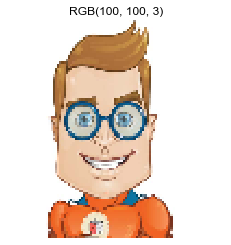

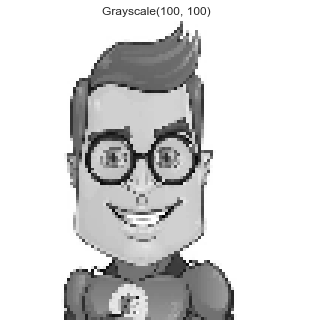

In [4]:
img_ = cv2.imread("./coder.jpg") #BGR
img_ = cv2.resize(img_,(100,100)) #Resize
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB) #colorconvert
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

drawImg(img,"RGB") # 3 channels as rgb
drawImg(img_gray,"Grayscale") # only 1 channel


In [5]:
#Hardcoded filters

def convolution(img,img_filter):
    W = img.shape[0] # Widht
    H = img.shape[1] # Height
    
    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                
    return new_img #Activation Map

In [6]:
# Defining our own blur filter
blur_filter = np.ones((3,3))/9.0

output1 = convolution(img_gray,blur_filter)

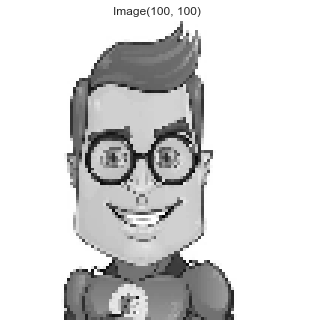

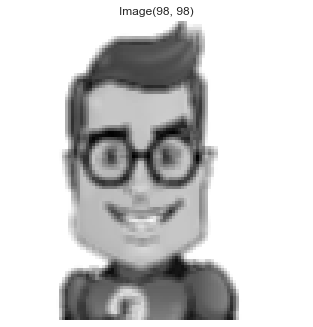

In [7]:
drawImg(img_gray)
drawImg(output1)

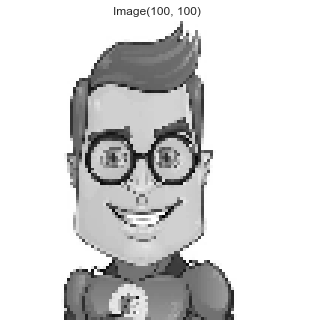

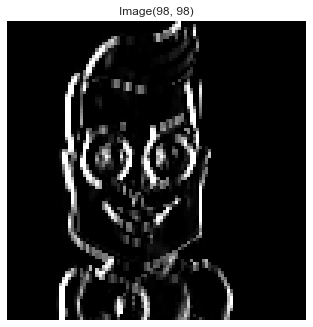

In [8]:
## Edge Filter
edge_filter = np.array([[1,0,-1],
                       [1,0,-1],
                       [1,0,-1]])

output2 = convolution(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output2)

## Convolution Layer
- contains various filters
- each filter extracts different kinds of features and gives 1 activation map
- multiple activation maps are combined by stacking to form output volume
- so CNN layer takes input a volume and produces an output volume of different shape

### Buzzwords in CNN's
- Convolution Layer
- Valid vs Same Convolution
- Padding
- Stride
- Filters/Kernels
- Pooling (Average/Maxpooling)

### Padding
- Convolution operation we have seen reduces "H" and "W" of original image
- But sometimes we want the output image to have same size as input image
- So we can achieve this by adding 0 value pixels(neurons) outside the original image
- This is called Padding

(100, 100, 3)


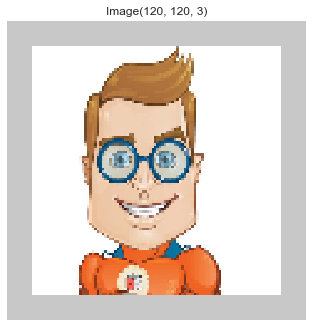

In [9]:
## Padding using numpy

print(img.shape)
#drawImg(img)

#Padding to this image
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=200)
drawImg(pad_img)

## Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.

- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)

- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as filter size.

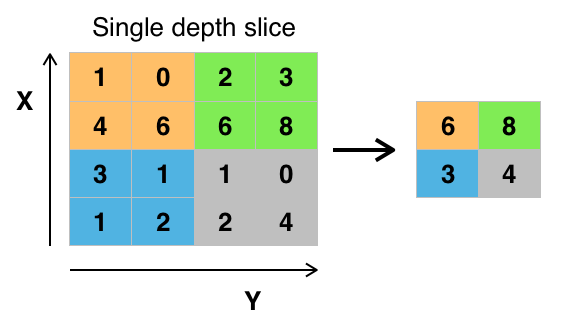

In [10]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

def pooling(X,mode="max"):
    stride = 2
    f = 2
    H,W = X.shape
    
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    return output

In [11]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
